In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data1 = [(random.random() + 1, random.random() + 1) for i in range(25)]
data2 = [(random.random() - 2, random.random() - 2) for i in range(25)]
data3 = [(random.random() + 1, random.random() - 2) for i in range(25)]
data4 = [(random.random()*6 -3, random.random()*6 - 3) for i in range(30)]
data = np.vstack((data1, data2, data3, data4))

In [3]:
def plot_data(X, cent):
    plt.figure(figsize=(10,10))
    colors = ['g', 'y', 'r', 'b', 'c', 'm', 'k', 'w']
    markers = ['o', 's', '*', '1', '+', 'D', '<', '8']
    for x in X:
        plt.scatter(x[0], x[1], s = 50)
    for i in range(len(cent)):
        plt.scatter(cent[i][0], cent[i][1], s = 90, c = colors[i])
    

In [4]:
def final_plot(X, y, cent):
    plt.figure(figsize=(10,10))
    colors = ['g', 'y', 'r', 'b', 'c', 'm', 'k', 'w']
    markers = ['o', 's', '>', '1', '+', 'D', '<', '8']
    for idx, cls in enumerate(np.unique(y)):
            plt.scatter(x=X[:, 0][y==cls], y=X[:, 1][y==cls], s = 90, c=colors[idx], marker = markers[idx])
    for i in range(len(cent)):
        plt.scatter(cent[i][0], cent[i][1], s = 900, c = colors[i], marker = '*')

In [5]:
def iteration(data, centers, old_labels):

    labels = np.array([])
    for line in data:
        dist = [np.sqrt((line[0]-cent[0])**2 + (line[1]-cent[1])**2) for cent in centers]
        labels = np.append(labels, min(zip(range(len(centers)), dist), key = lambda t: t[1])[0])
        

    change = sum(old_labels != labels)

    new_centers = []
    for k in range(len(centers)):
        coord = [0, 0]
        count = 0
        for i in range(len(labels)):
        
            if labels[i] == k:
                count += 1
                coord[0]+=data[i][0]
                coord[1]+=data[i][1]
        if count != 0:
            new_centers.append([coord[0]/count, coord[1]/count])
        else:
            new_centers.append(centers[k])

    return new_centers, labels, change

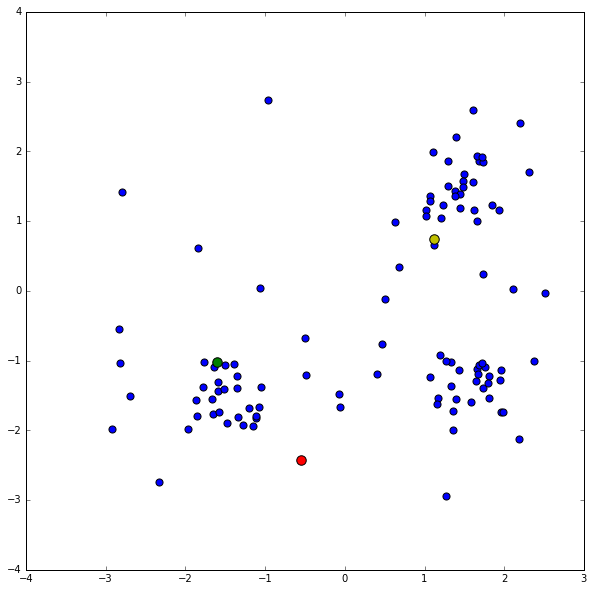

In [6]:
def clustering(data, n_centers, tolerance):
    error = 0
    change = np.inf
    centers = [(random.random()*6 - 3, random.random()*6 - 3) for i in range(n_centers)]
    labels = [-1 for i in range(len(data))]
    while change > len(data) * tolerance:        
        centers, labels, change = iteration(data, centers, labels)
    for i in range(len(data)):
        error += np.sqrt((data[i][0]-centers[int(labels[i])][0])**2 + (data[i][1]-centers[int(labels[i])][1])**2)
    return centers, error
        
#clustering(data, 3, 0.1)
plot_data(data, [(random.random()*6 - 3, random.random()*6 - 3) for i in range(3)])        

In [7]:
def stats(data, n_centers, tolerance, n_iter):
    cent_array = []
    errors = []
    for i in range(n_iter):
        res = clustering(data, n_centers, tolerance)
        cent_array.append(res[0])
        errors.append(res[1])
    answer = min(zip(cent_array, errors), key = lambda t: t[1])[0]

    labels = np.array([])
    for line in data:
        dist = [np.sqrt((line[0]-cent[0])**2 + (line[1]-cent[1])**2) for cent in answer]
        labels = np.append(labels, min(zip(range(len(answer)), dist), key = lambda t: t[1])[0])
    
    
    final_plot(data, labels, answer)
    return answer

The centers of the clusters are:  [[1.3703462606361643, 1.4737086027444142], [1.5475351296131961, -1.2655213535697956], [-1.5480183672752561, -1.3377226726317495]]


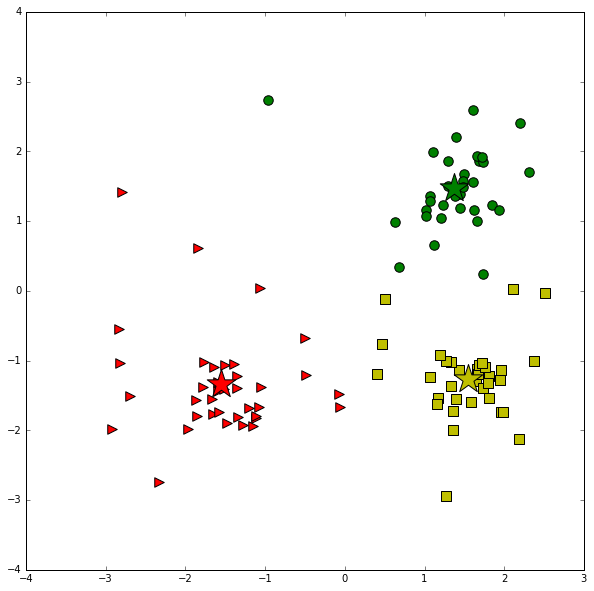

In [8]:
print 'The centers of the clusters are: ', stats(data, 3, 0.1, 10)

In [9]:
data_dima = []
with open('Dima.txt') as fin:
    for line in fin.readlines():
        data_dima.append((np.log10(float(line.split()[0])), 100*float(line.split()[1])))
np_data1 = np.array(data_dima[:100])

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
np_data = scaler.fit_transform(np_data1)

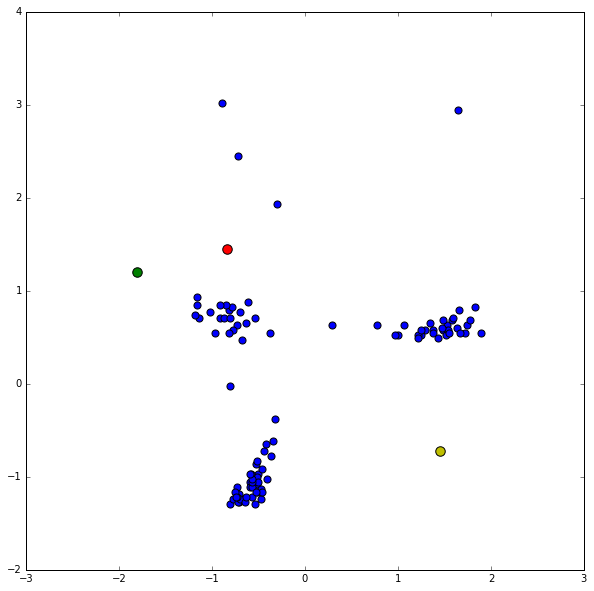

In [11]:
centers = [(random.random()*4 - 2, random.random()*4 - 2) for i in range(3)]
plot_data(np_data, centers)

In [12]:
def stats_dima(data, n_centers, tolerance, n_iter):
    cent_array = []
    errors = []
    for i in range(n_iter):
        res = clustering_dima(data, n_centers, tolerance)
        cent_array.append(res[0])
        errors.append(res[1])
    answer = min(zip(cent_array, errors), key = lambda t: t[1])[0]

    labels = np.array([])
    for line in data:
        dist = [np.sqrt((line[0]-cent[0])**2 + (line[1]-cent[1])**2) for cent in answer]
        labels = np.append(labels, min(zip(range(len(answer)), dist), key = lambda t: t[1])[0])
    
    
    final_plot(data, labels, answer)
    return answer


def clustering_dima(data, n_centers, tolerance):
    error = 0
    change = np.inf
    centers = [(random.random()*4 - 2, random.random()*4 - 2) for i in range(n_centers)]
#    print centers
    labels = [-1 for i in range(len(data))]
    while change > len(data) * tolerance:        
        centers, labels, change = iteration(data, centers, labels)
    for i in range(len(data)):
        error += np.sqrt((data[i][0]-centers[int(labels[i])][0])**2 + (data[i][1]-centers[int(labels[i])][1])**2)
    return centers, error

The centers of the clusters are:  [[1.4481181706724133, 0.67586238627991102], [-0.77204476473228723, 0.88164970022089573], [-0.5725346343588763, -1.0656256162057511]]


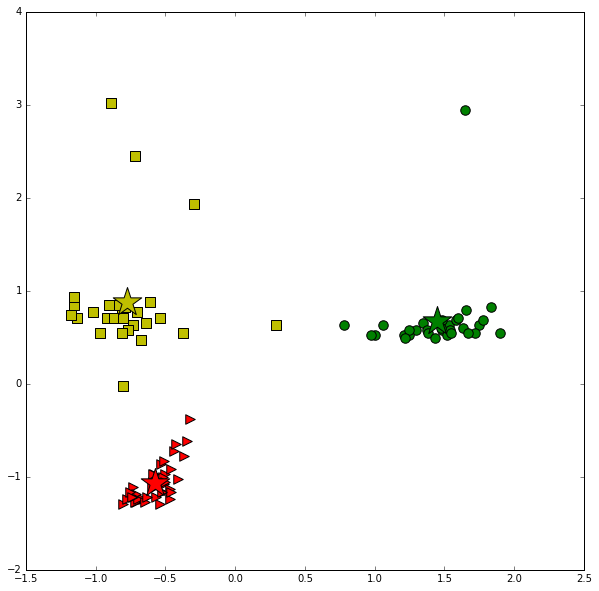

In [13]:
print 'The centers of the clusters are: ', stats_dima(np_data, 3, 0.1, 100)